# Régression linéaire

Il arrive fréquemment qu'on veuille ajuster un modèle théorique sur des points de données expérimentaux. Le plus courramment utilisé pour nous est l'ajustement d'un modèle affine $Y = aX + b$ à des points expérimentaux $(x_i, y_i)$ (i allant de 1 à  k). On veut connaître les valeurs de $a$ et $b$ qui donne une droite passant au plus près des points expérimentaux (on parle de __régression linéaire__).

## Modélisation du problème

Nous allons donner, sans rentrer dans les détails un sens au terme "au plus près". La méthode proposée ici s'appelle la méthode des __moindres carrés__. Dans toute la suite la méthode proposée suppose qu'il n'y a pas d'incertitudes sur les abscisses $x_i$ ou qu'elles sont négligeables devant celles sur les $y_i$.

```{margin}
Cf. les cours de physique et chimie pour la notion d'incertitude de mesure. On gardera l'idée qu'elle quantifie la variabilité de la mesure d'une grandeur.
```

Du fait des incertitudes (de la variabilité des mesures), les points $(x_i, y_i)$ ne sont jamais complètement alignés. Pour une droite d'ajustement $y_{adj} = ax + b$, il y aura un écart entre $y_i$ et $y_{adj}(x_i)$. _La méthode des moindres carrés consiste à minimiser globalement ces écarts, c'est-à-dire à minimiser par rapport à a et b la somme des carrés des écarts, soit la fonction_ :

$$
\Gamma(a, b) = \sum_{i=1}^{i=k} \left( y_i - y_{adj}(x_i) \right)^2 = \sum_{i=1}^{i=k} \left( y_i - (a x_i + b) \right)^2
$$

Les tracés ci-après montre le passage (gauche à droite) des écarts modèle-mesures pour un couple $(a,b)$ au calcul de $\Gamma$ pour quelques couples de valeurs $(a,b)$. On remarque que plus $\Gamma(a, b)$ est faible, plus la droite d'ajustement semble passer près des points de mesure.

(sharey_ex)=

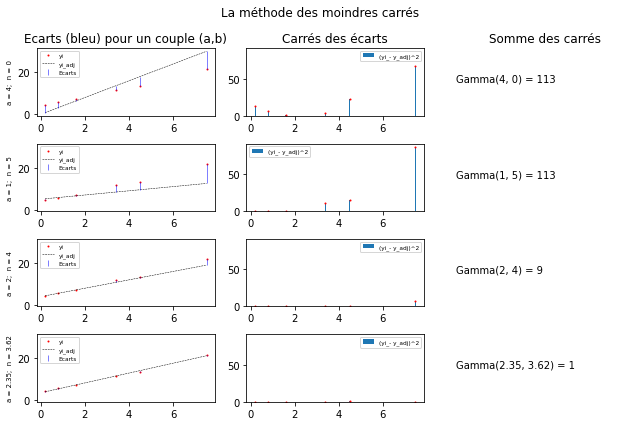

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.array([0.2, 0.8, 1.6, 3.4, 4.5, 7.5])
yi = np.array([4.4, 5.7, 7.2, 11.7, 13.3, 21.8])

a = [4, 1, 2, 2.35]
b = [0, 5, 4, 3.62]


f, ax = plt.subplots(4, 3, figsize=(9, 6), sharey='col')
f.suptitle("La méthode des moindres carrés")
ax[0, 0].set_title("Ecarts (bleu) pour un couple (a,b)")
ax[0, 1].set_title("Carrés des écarts")
ax[0, 2].set_title("Somme des carrés")

for i in range(len(a)):
    ax[i, 0].set_ylabel("a = {};  n = {}".format(a[i], b[i]), fontsize='x-small')
    ax[i, 0].plot(xi, yi, marker='o', markersize=1, color='red', linestyle='', label='yi')
    yi_adj = a[i] * xi + b[i]
    ecm = (yi + yi_adj) / 2
    ecu = np.abs(yi - yi_adj) / 2
    ax[i, 0].plot(xi, yi_adj, color='black', linestyle='--', linewidth=0.5, label='yi_adj')
    ax[i, 0].errorbar(xi, ecm, yerr=ecu, color='blue', linestyle='', label="Ecarts", linewidth=0.5)
    ax[i, 0].legend(fontsize='xx-small')
    
    en = (yi - yi_adj) ** 2
    ax[i, 1].plot(xi, en, linestyle='', marker='o', markersize=1, color="red")
    ax[i, 1].bar(xi, en, width=.05, label="(yi_- y_adj)^2")
    ax[i, 1].legend(fontsize='xx-small')

    Gamma = ((yi - (a[i] * xi + b [i])) ** 2).sum()
    ax[i, 2].set_axis_off()
    ax[i, 2].text(0, 0.5, "Gamma({}, {}) = {:.0f}".format(a[i], b[i], Gamma))

f.tight_layout()
plt.show()


On ne présente pas ici les calculs permettant de minimiser une fonction de plusieurs variables mais on admettra que dans le cas précédent, les valeurs $\hat a$ et $\hat b$ qui minimise $\Gamma(a,b)$ sont calculables analytiquement. Elles ont pour expression (pas à connaître par coeur) :

$$
\begin{cases}
	\hat a &= \frac{\frac{1}{k}\sum_i x_i y_i - \left (\frac{1}{k}\sum x_i\right ) \left (\frac{1}{k}\sum y_i\right )}{\frac{1}{k}\sum_i x_i^2 - {\left (\frac{1}{k}\sum x_i\right )}^2}\\
	\hat b &= \overline{y} - \hat a \overline{x}
\end{cases}
$$

avec $\overline{y}$ la moyenne des $y_i$ et $\overline{x}$ la moyenne des $x_i$.

## numpy.polyfit

### Syntaxe
La majorité des méthodes numériques proposées par les logiciels utilisent la méthode des moindres carrés (DROITEREG sous Excel et Libreoffice par exemple). C'est aussi le cas de la fonction `polyfit` de la bibliothèque `numpy`. Sa syntaxe (version simple) est:

```{code-block}
polyfit(x, y, deg)
```
où :
* `x` est le vecteur contenant les valeurs des abscisses
* `y` est le vecteur contenant les valeurs des ordonnées
* `deg` le degré (un entier) du polynôme d'ajustement. Pour nous, ce sera toujours 1.

```{margin}
`polyfit` permet en effet un ajustement _polynomial_ par un polynôme de degré supérieur à 1.
```

Cette fonction renvoie un vecteur contenant les coefficient du polynôme par __degré décroissants__. Ainsi, pour un degré 1 et si on écrit la droite d'ajustement $Y = aX + b$, le vecteur aura la forme : `array([a, b])`



### Méthode d'utilisation.
Réaliser une régression linéaire demande de la rigueur, il ne faut pas simplement appliquer la formule précédente. Vous devez :
1. Tracer le nuage de points des $(x_i, y_i)$ __et vérifier qu'ils sont globalement alignés__. Il ne sert à rien de faire une régression linéaire s'il y a des points qui dévient clairement d'un modèle affine ou si la tendance n'est pas affine.
2. Ensuite seulement, utiliser la fonction polyfit pour obtenir les paramètres d'ajustement optimaux.
3. Représenter la droite d'ajustement sur le même graphique pour vérifier qu'elle est cohérente avec les points de mesures. Des méthodes de tests seront présentées plus précisément en physique et en chimie.

```{margin}
On ne trace pas des ajustments affine à tout va. Il est notamment __inutile__ de tracer une droite d'ajustement si le modèle théorique attendue n'est pas affine...

```


### Un exemple de syntaxe

L'observation des points de mesure montre effectivement une tendance linéaire
--------
La droite ajustée a pour équation :
2.353619302949061 * x + 3.6224754244861437
En pratique, il faudrait tronquer aux bons chiffres significatifs
--------


' Ce sont des fausses données sans incertitude de mesure, on ne va donc pas comparer le modèle ajusté aux résultats expérimentaux. (cf. exercice)'

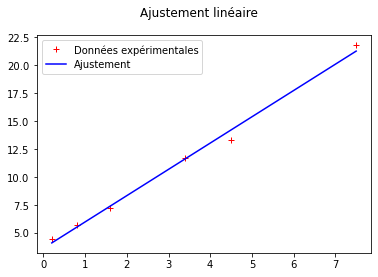

In [2]:
import numpy as np
import matplotlib.pyplot as plt

""" Fausses (!) données expérimentales """
xi = np.array([0.2, 0.8, 1.6, 3.4, 4.5, 7.5])
yi = np.array([4.4, 5.7, 7.2, 11.7, 13.3, 21.8])

"""Tracé graphique pour test visuel"""
f, ax = plt.subplots()
f.suptitle("Ajustement linéaire")

ax.plot(xi, yi, marker='+', label='Données expérimentales', linestyle='', color='red')  # On voit l'intérêt des options pour ne pas relier les points

# plt.show()  
""" La ligne précédente a été commentée pour pouvoir tracer ensuite la droite de régression linéaire. 
En pratique, elle permet de vérifier que les points s'alignent à peu près."""

print("L'observation des points de mesure montre effectivement une tendance linéaire")



"""Ajustement linéaire"""
p = np.polyfit(xi, yi, 1)  # p est un vecteur contenant les coefficients.
y_adj = p[0] * xi + p[1]  # On applique la droite ajustée aux xi pour comparaison.

print("--------")
print("La droite ajustée a pour équation :")
print(str(p[0]) + " * x + " + str(p[1]))
print("En pratique, il faudrait tronquer aux bons chiffres significatifs")
print("--------")


ax.plot(xi, y_adj, marker='', label='Ajustement', linestyle='-', color='blue')  # On voit l'intérêt des options

ax.legend()

""" Ce sont des fausses données sans incertitude de mesure, on ne va donc pas comparer le modèle ajusté aux résultats expérimentaux. (cf. exercice)"""

## Pour vous entraîner
Voici le [lien vers les exercices pour vous entraîner sur l'utilisation de la régression linéaire](https://pcsi3physiquestan.github.io/intro_python_td/notebook/exo_polyfit.html)